In [1]:
import numpy as np                       # mathematical methods
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
%matplotlib inline

# Wahrscheinlichkeitstheorie

## Zufallsvariable und Wahrscheinlichkeitsraum

## Erwartungswert und Varianz

## Diskrete Zufallsvariablen und Wahrscheinlichkeitsverteilungen

## Mehrdimensionale Verteilungen

## <span style="color:blue">Kontinuierliche Zufallsvariable und Wahrscheinlichkeitsverteilungen</span>


## Wahrscheinlichkeitsverteilung kontinuierlicher Zufallsvariable

Unendlich viele dichte Ereignisse (meist $x\in\mathbb{R}$) möglich.

#### Beispiele

- Rauschspannung
- Aktienkurse
- Chemikalienkonzentrationen

### Problem: Punktwahrscheinlichkeit

$$P(x=a) \rightarrow 0$$

discrete   2 has center probabilities [2537. 2443.]
discrete   6 has center probabilities [ 117.  675. 1745. 1716.  632.   95.]
discrete  60 has center probabilities [205. 226. 207. 198. 195. 201.]


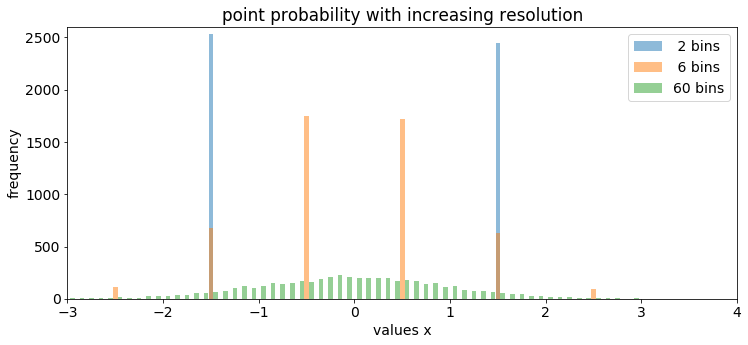

In [3]:
'''discrete --> continuous distribution: single probability'''
f = plt.figure(figsize=(12, 5))
np.random.seed(9876543)
x = stats.norm(0., 1.).rvs(size=5000)     # draw random numbers

for n in (2, 6, 60):                      # discretisize to n bins
    h = plt.hist(x, bins=np.linspace(-3., 3., n+1), align='mid',
                 rwidth=0.008*n, alpha=0.5, label='{:2d} bins'.format(n))
    print('discrete {:3d} has center probabilities {}'
          .format(n, h[0][max(0, int(n/2-3)):min(n, int(n/2+3))]))
plt.axis((-3., 4., 0, 2600 ))
plt.title('point probability with increasing resolution')
plt.xlabel('values x')
plt.ylabel('frequency')
plt.legend();

discrete    2 bins have center probabilities [0.50943775 1.        ]
discrete    6 bins have center probabilities [0.15903614 0.50943775 0.85401606 0.98092369]
discrete   60 bins have center probabilities [0.46787149 0.50943775 0.54919679 0.58835341]
discrete  600 bins have center probabilities [0.50421687 0.50943775 0.5126506  0.51767068]


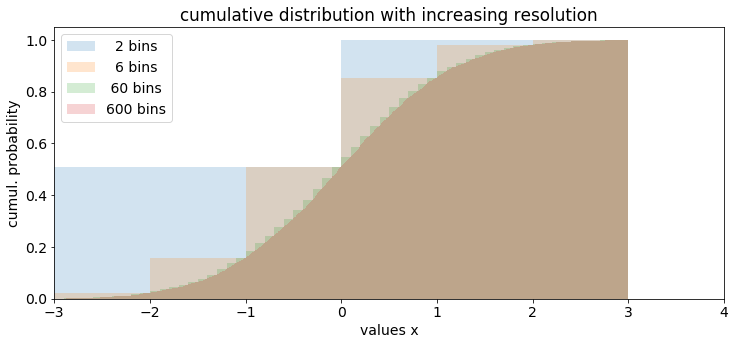

In [4]:
'''discrete --> continuous distribution: cumulative'''
f = plt.figure(figsize=(12, 5))
for n in (2, 6, 60, 600):                # discretisize to n bins
    h = plt.hist(x, bins=np.linspace(-3., 3., n+1), density=True, 
                 cumulative=True, alpha=0.2, label='{:3d} bins'.format(n))
    print('discrete {:4d} bins have center probabilities {}'
          .format(n, h[0][max(0, int(n/2-2)):min(n, int(n/2+2))]))
plt.axis((-3., 4., 0, 1.05 ))
plt.title('cumulative distribution with increasing resolution')
plt.xlabel('values x')
plt.ylabel('cumul. probability')
plt.legend();

#### Gemeinsamkeit *Steigung*: 

$\qquad \qquad \qquad \qquad \mathrm{diskret:} \; \frac{\Delta F}{\Delta x} = m \qquad \qquad \qquad \mathrm{kontinuierlich:}\; \frac{\mathrm{d}F}{\mathrm{d}x} \; = f$

## Wahrscheinlichkeitsdichte $f(x)$

$$f(x) \geq 0$$
<br>

<div class="alert alert-block alert-success">
$$P(a\leq x \leq b) =  \int_{a}^{b} f(x)\;\mathrm{d}x \;\leq 1$$
</div>

Möglich:
$$f(x) \nleq 1$$

#### Normierung

<div class="alert alert-block alert-success">
$$\int_{x=-\infty}^{\infty} f(x)\mathrm{d}x = 1$$
</div>

in width=0.20 are 100 drops or 20.0%, density=1.0
in width=0.05 are  29 drops or  5.8%, density=1.2
in width=0.01 are   6 drops or  1.2%, density=1.2


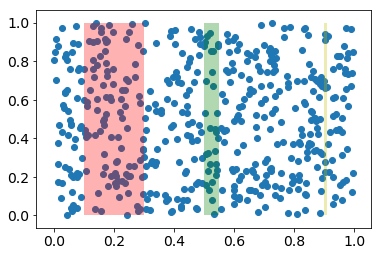

In [6]:
'''raindrops are falling - show density'''
np.random.seed(98765432)
x = np.random.rand(500)                   # 500 raindrops x coordinate 0..1
y = np.random.rand(500)                   #               y coordinate 0..1
plt.scatter(x,y)                          # show the raindrops
# define three stripes (location, width, color)
s = ((.1, .2, 'r'), (.5, .05, 'g'), (.9, .01, 'y'))
for si in s:                              # choose one of above
    a, w, col = si                        # separate location a and width w
    # barh(y-bottom, x-width, y-height, x-left) 
    plt.barh( .5, w, 1., a, color=col, alpha=.3)
    # select x between stripe borders
    n = x[np.logical_and(a<x, x<=a+w)].shape[0]
    print('in width={:.2f} are {:3d} drops or {:4.1f}%, density={:.1f}'
          .format(w, n, n/500*100, n/w/500))

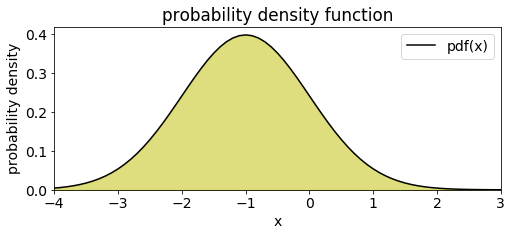

In [6]:
'''probability density function of x'''
xgrid = np.linspace(-4, 3, 70+1) # just some x values
distrib = stats.norm(-1., 1)     # define a probability distribution & freeze this
f = plt.figure(figsize=(8, 3))
plt.title('probability density function')
plt.plot(x, distrib.pdf(x), 'k-', label='pdf(x)')
# make area under curve yellow
plt.fill_between(x, 0, distrib.pdf(x), color='y', alpha=0.5)
plt.axis((-4., 3., 0, 0.42))
plt.xlabel('x')
plt.ylabel('probability density')
plt.legend();

probability of x between -0.80 and -0.20 is 0.209 (of norm=0.9990)


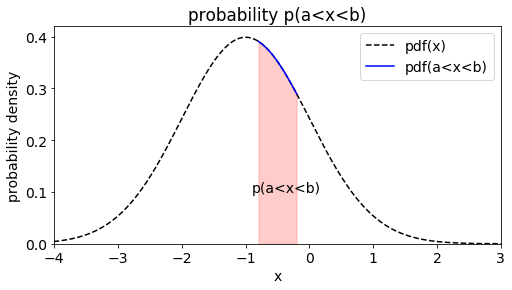

In [7]:
'''probability of x between a and b'''
x = np.linspace(-6, 4, 1001)        # dense enough x values for smooth graphics
a = -0.8                            # chose lower 
b = -0.2                            # and upper boundary of ROI

f = plt.figure(figsize=(8, 4))
plt.title('probability p(a<x<b)')
# complete distribution, frozen from above
plt.plot(x, distrib.pdf(x), 'k--', label='pdf(x)')
xab = np.linspace(a, b, 11)  # select ROI, make smooth enough
plt.plot(xab, distrib.pdf(xab), 'b-', label='pdf(a<x<b)') # highlight ROI in blue
plt.fill_between(xab, 0, distrib.pdf(xab), color='r', alpha=0.2) # and make area visible
plt.text(-0.9, 0.1, 'p(a<x<b)')
plt.axis((-4., 3., 0, 0.42))
plt.xlabel('x')
plt.ylabel('probability density')
plt.legend();

ptotal = distrib.pdf(x).mean()*(4.-(-6.))            # normalized?  
xab = np.linspace(a, b, 1001)                        # dense enough x values
p = distrib.pdf(xab).mean()*(b-a)                    # pseudo integral / 
print('probability of x between {:.2f} and {:.2f} is {:.3f} (of norm={:.4f})'
      .format(a, b, p, ptotal))

## (Wahrscheinlichkeits-) Verteilungsfunktion

<div class="alert alert-block alert-success">
$$F(x) = \int_{x'=-\infty}^{x} f(x')\;\mathrm{d}x' $$
</div>
Vergleiche mit diskreter Verteilungsfunktion:
$$F(x) = \sum_{x_i<=x}p(x_i)$$

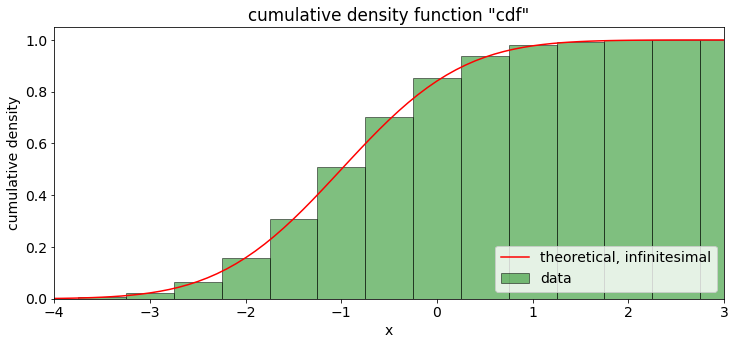

In [8]:
''' N=10 bins as discrete example above
    x from above: origin was standard normal distribution'''
np.random.seed(9876543)
x = distrib.rvs(size=5000)          # draw random numbers from chosen norm
f = plt.figure(figsize=(12, 5))
plt.hist(x, bins=np.linspace(-4., 3., 14+1), label='data', 
         color='green', cumulative=True, alpha=0.5, density=True, align='right',
         edgecolor='black', linewidth=1.)
# cdf
xi = np.linspace(-4., 3., 70+1)     # make an x-axis with finer resolution
y = distrib.cdf(xi)                 # use the cdf-fct (with data x) for xi
plt.plot(xi, y, 'r-', label='theoretical, infinitesimal') 
plt.axis((-4., 3., 0, 1.05))
plt.xlabel('x')
plt.ylabel('cumulative density')
plt.title('cumulative density function "cdf"')
plt.legend(loc='lower right');

## Eigenschaften der Verteilungsfunktion

für integrierbare Dichten $f(x)$
$$F(x) = \int_{-\infty}^x f(x')\;\mathrm{d}x'$$

- $F(x)$ ist monoton in $x$
- $F(-\infty) = 0$
- $F(\infty) = 1$
- $P(a\leq x\leq b) = \int_a^b f(x)\;\mathrm{d}x = F(b)-F(a)$
- $P(X\geq c) = 1-F(c)$
- Punktwahrscheinlichkeit: wenn $a=x=b$ dann $P(X\!=\!b) = F(b)-F(b) = 0$
<div class="alert alert-block alert-success">
wichtig!
</div>

### Anschaulich

cumulated probability up to x1=-0.80 is 0.58


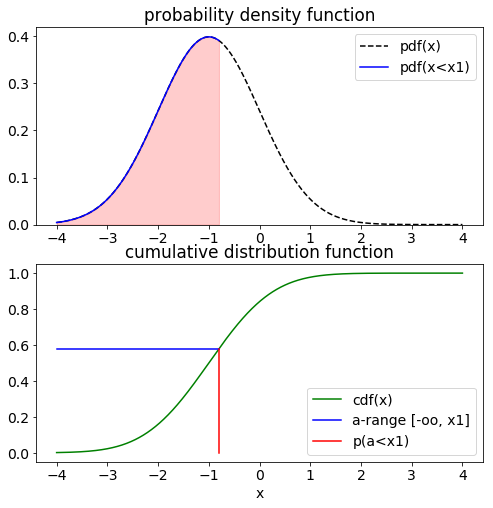

In [10]:
'''cumulated probability of x up to a'''
r0 = -4.
r1 = 4.
x = np.linspace(r0, r1, 801)      # dense enough a values
x1 = -0.8                         # choose an x: x1
p1 = distrib.cdf(x1)              # calculate x1' probability
print('cumulated probability up to x1={:.2f} is {:.2f}'
      .format(x1, p1))

f = plt.figure(figsize=(8, 8))
f.add_subplot(211)                # 2 subplots, this 1st column, 1st row
plt.title('probability density function')
plt.plot(x, distrib.pdf(x), 'k--', label='pdf(x)')
xa = np.linspace(r0, x1, 81)      # x values up to x1
# plot blue pdf-line and fill space below (from 0 upwards to pdf)
plt.plot(xa, distrib.pdf(xa), 'b-', label='pdf(x<x1)')
plt.fill_between(xa, 0, distrib.pdf(xa), color='r', alpha=0.2)
plt.ylim(0, 0.42)                 # include max p ~0.4
plt.legend()

f.add_subplot(212)           # from the 2 subplots: this 1st columns, 2nd row
plt.title('cumulative distribution function')
plt.xlabel('x')
x = np.linspace(r0, r1, 801)      # dense enough x values
# cdf of complete distribution over all x
plt.plot(x, distrib.cdf(x), 'g-', label='cdf(x)')
cc = distrib.cdf(x1)              # cdf(x=x1)
# blue line for range of x from left to x1 in height cc
plt.plot([r0, x1], 2*[cc], 'b-', label='a-range [-oo, x1]')
# red line for p=0 to cc at x=x1
plt.plot(2*[x1], [0, cc], 'r-', label='p(a<x1)')
plt.legend(loc='lower right');

probability of x between -0.80 and -0.20 is 0.209


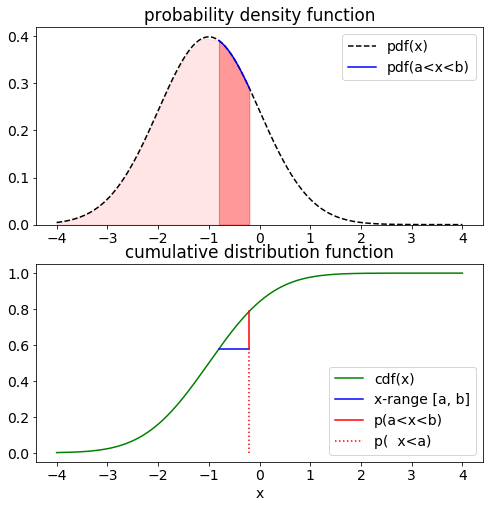

In [11]:
'''probability of x between a and b'''
x = np.linspace(-4, 4, 801)       # dense enough x values
a = -0.8                          # chose lower 
b = -0.2                          # and upper boundary
p = distrib.cdf(b)-distrib.cdf(a) # calculate probability
print('probability of x between {:.2f} and {:.2f} is {:.3f}'
      .format(a, b, p))

f = plt.figure(figsize=(8, 8))
f.add_subplot(211)                # 2 subplots, this 1st column, 1st row
plt.title('probability density function')
plt.plot(x, distrib.pdf(x), 'k--', label='pdf(x)')
xab = np.linspace(-4, a, 11)      # x values from "-infty" to a
plt.fill_between(xab, 0, distrib.pdf(xab), color='r', alpha=0.1)
xab = np.linspace(a, b, 11)       # x values from a to b
# plot blue pdf-line from a to b and fill space below (from 0 upwards to pdf)
plt.plot(xab, distrib.pdf(xab), 'b-', label='pdf(a<x<b)')
plt.fill_between(xab, 0, distrib.pdf(xab), color='r', alpha=0.4)
plt.ylim(0, 0.42)
plt.legend()

f.add_subplot(212)
plt.title('cumulative distribution function')
plt.xlabel('x')
# green cdf of complete distribution over all x
plt.plot(x, distrib.cdf(x), 'g-', label='cdf(x)')
cc = distrib.cdf([a, b])          # cdf of left a and right b 
# blue line for range of x from a to b in height cdf(a)
plt.plot([a, b], 2*[cc[0]], 'b-', label='x-range [a, b]')
# red line for p=cdf(a) to cdf(b) at x=b
plt.plot(2*[b], cc, 'r-', label='p(a<x<b)')
plt.plot(2*[b], [0, cc[0]], 'r:', label='p(  x<a)')
plt.legend(loc='lower right');

### Vergleich mit diskreten Verteilungen

| Variable  . . . . . . . . . . . . . . . . . | diskret . . . . . . . . . . . . . .                   | kontinuierlich . . . . . . . . . . . . . . . . . 
|-------------------------| :-------------------------- | :---------------------------------------------------
| Wert $x$                | ${x_i \;\; i\in\mathbb{N}}$ | ${x\in\mathbb{R}}$
| Wahrscheinlichkeit $p$  | $p{(X\!=\!x_i)=p_i}$        | ${p(a\leq x\leq b)=\int_a^b f(x)\mathrm{d}x}$
| .                       | `pmf()`                     | `pdf()`
| Verteilungsfunktion $F$ | Schritte ${\Delta F = p_x}$ | kontinuierlich ${dF = f\mathrm{d}x}$
| .                       | `cdf()`                     | `cdf()`


## Definition Erwartungswert

Sei $X$ eine Zufallsvariable auf $\mathbb{R}$ mit Wahrscheinlichkeitsdichte $f(x)$, dann ist der Erwartungswert von $X$

<div class="alert alert-block alert-success">
$$\mathcal{E}(X) = \mu = \int_{-\infty}^{\infty} f(x)\cdot x\; \mathrm{d}x$$
</div>

#### Vergleich diskreter Erwartungswert

$$\mathcal{E}(X) = \mu = \sum_{i=1}^{N} p(x_i)\cdot x_i$$

expectation value of x under pdf is -0.200
approximated expectation value   is -0.200


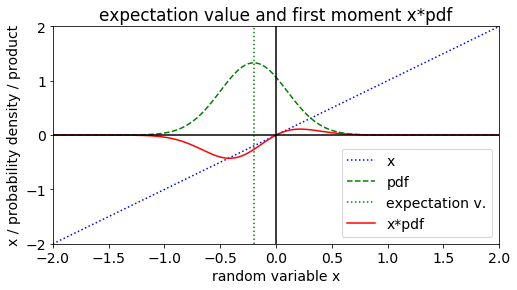

In [12]:
'''meaning of expectation value of x as weighted integral'''
r0, r1 = (-2.0, 2.0)                        # borders
ndistrib = stats.norm(-0.2, 0.3)            # define and freeze a (normal) probability distribution
x = np.linspace(r0, r1, 40*round(r1-r0)+1)  # dense enough values
px = ndistrib.pdf(x)                        # get x's probability

f = plt.figure(figsize=(8, 4))              # space for graphics
plt.title('expectation value and first moment x*pdf')
plt.xlabel('random variable x')
plt.ylabel('x / probability density / product')
plt.plot(x, x,    'b:',  label='x')         # x (just repeated as y value)
plt.plot(x, px,   'g--', label='pdf')       # probability density of x - as a weight

# calculate and show expectation value
print('expectation value of x under pdf is {:.3f}'.format(ndistrib.expect()))
plt.plot(2*[ndistrib.expect()], [-2, 2], 'g:', label='expectation v.')

# expectation value is integral of local x*px function
# meaning: x weighted with its probability density 
# integral is then area under red, here negative
# approximation: sum over the 160 small rectangles of size dx
dx = (r1-r0)/(len(x)-1)                     # length of approximation rectangle
expectation_approx = dx*(x*px).sum()        # product is point-wise
print('approximated expectation value   is {:.3f}'.format(expectation_approx))

plt.plot(x, x*px, 'r-',  label='x*pdf')     # local product x with pdf
plt.plot([r0, r1], 2*[0], 'k-')             # coordinate system  
plt.plot(2*[0], [r0, r1], 'k-')
plt.axis((r0, r1, r0, r1))                  # set borders
plt.legend(loc='lower right');              # who is who

## Definition Varianz

Sei $X$ eine Zufallsvariable auf $\mathbb{R}$ mit Wahrscheinlichkeitsdichte $f(X)$ und Erwartungswert $\mu$, dann

<div class="alert alert-block alert-success">
$$\begin{aligned}
\mathrm{Var}(X) = \sigma^2 & = \int_{-\infty}^{\infty} (x-\mu)^2\cdot f(x) \mathrm{d}x \\
& = \mathcal{E}((x-\mu)^2)
\end{aligned}$$
</div>

### Verschiebungssatz:

$$ \mathrm{Var}(X) = \mathcal{E}(x^2) - (\mathcal{E}(x))^2$$

#### Beweis: **[ÜA]**

## Rechenregeln
Sei g(x) eine reelle Funktion. Dann gilt für $Y=g(X)$
$$\mathcal{E}(Y) = \mathcal{E}(g(X)) = \int_{-\infty}^{\infty}f(x)\cdot g(x)\;\text{d}x$$

### lineare Transformation Erwartungswert
Für $Y = aX+b$ ergibt sich
$$\mathcal{E}(Y) = \mathcal{E}(aX+b) = a\mathcal{E}(x)+b$$

#### Beweis:

$$\begin{aligned}
\qquad\int_{-\infty}^{\infty} (ax+b)f(x)dx &= \int_{-\infty}^{\infty} axf(x)dx + \int_{-\infty}^{\infty} bf(x)dx \\
    &= aE(X) + b\cdot 1
\end{aligned}$$

### lineare Transformation Varianz
Für die Varianz unter der linearen Transformation $Y = aX+b$ ergibt sich

$$\mathcal{Var}(Y) = \mathcal{Var}(aX+b) = a^2\cdot \mathcal{Var}(X)$$

#### Beweis:

Wie bei der ($\rightarrow$) diskreten Definition

$$\begin{aligned}
    \mathcal{Var}(aX+b) &= \mathcal{E}([aX+b-\mathcal{E}(aX+b)]^2) \\
    \qquad &= \mathcal{E}([aX+b-a\mathcal{E}(X)-b]^2) \\
    \qquad &= a^2\mathcal{E}([X-\mathcal{E}(X)]^2) \\
    &= a^2\mathcal{Var}(X)
\end{aligned}$$

## Anwendung der linearen Transformation: Standardisieren

Mittels der speziellen linearen Transformation $Z = \frac{1}{\sigma}(X -\mu)$ ergibt sich

$$\mathcal{E}(Z) = 0$$
$$\mathrm{Var}(Z) = 1$$
*Bitte merken für später*

## Definition Schiefe

$$\textrm{Schiefe}(X) = \frac{1}{\sigma^3}\int_{-\infty}^{\infty} (x-\mu)^3\cdot f(x) \mathrm{d}x \\$$
$$ \qquad = \mathcal{E}(z^3)$$

- $= 0 \qquad \text{symmetrische Verteilung}$
- $> 0 \qquad \text{linkssteile Verteilung}$
- $< 0 \qquad \text{rechtssteile Verteilung}$

skewness(Normal x0)   = 0.009
skewness(Mix [x1,x2]) = 0.926


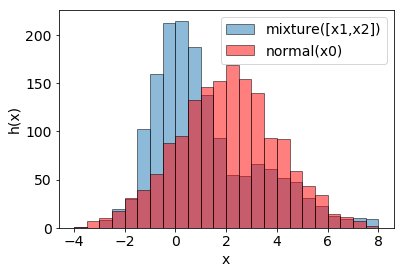

In [13]:
'''Show skewness of distributions'''
np.random.seed(234567)
x0 = stats.norm(2, 2).rvs(size=1600)        # to compare: normal distribution
x1 = stats.norm(0, 1).rvs(size=1000)        # first standard normal distribution
x2 = stats.norm(3, 2).rvs(size=600)         # second normal: shiftet and broadened to "right" 
bins=np.linspace(-4, 8, 25)
x3 = np.concatenate((x1, x2))               # mixture of x1 and x2
plt.hist(x3, alpha=.5, bins=bins, label='mixture([x1,x2])', edgecolor='black')
plt.hist(x0, alpha=.5, bins=bins, label='normal(x0)', color='r', edgecolor='black')
print('skewness(Normal distribution) = {:.3f}'.format(stats.norm(2, 2).stats(moments = 's')))
print('skewness(Normal data x0)      = {:.3f}'.format(stats.skew(x0)))
print('skewness(Mix data[x1,x2])     = {:.3f}'.format(stats.skew(x3)))
plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend();

## Definition Wölbung, Exzeß, Kurtosis

Mit dem *vierten Moment* $\;m_4 = \int_{-\infty}^{\infty} (x-\mu)^4\cdot f(x) \mathrm{d}x\;$ ist

$$ \textrm{Kurtosis}(X) = \frac{m_4}{(\sigma^2)^2} - 3$$

Mit der Verschiebung um $3$ ist gewährleistet, daß die Normalverteilung die Kurtosis $0$ hat.

- $ = 0 \qquad \text{wie Normalverteilung} $
- $ > 0 \qquad \text{spitzer, langschwänziger}$
- $ < 0 \qquad \text{stumpfer, tailliert}$

skewness(Normal)         =  0.000
kurtosis(Normal data)    = -0.040
kurtosis(Student-t)      =  6.000
kurtosis(Student-t data) =  6.449


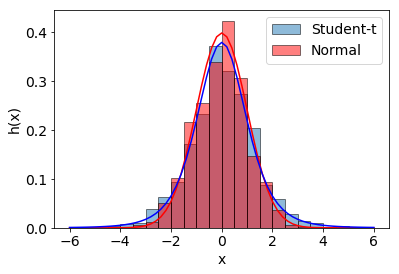

In [17]:
'''Show kurtosis of distributions'''
np.random.seed(123456)
xgrid = np.linspace(-6, 6, 60+1)
distrib1 = stats.norm(0, 1)
distrib2 = stats.t(5)
x1 = distrib1.rvs(size=1000)
x2 = distrib2.rvs(size=1000)
bins=np.linspace(-6, 6, 25)
plt.hist(x2, alpha=.5, bins=bins, density=True, label='Student-t', edgecolor='black')
plt.hist(x1, alpha=.5, bins=bins, density=True, label='Normal', color='r', edgecolor='black')
plt.plot(xgrid, distrib1.pdf(xgrid), 'r-')
plt.plot(xgrid, distrib2.pdf(xgrid), 'b-')
print('skewness(Normal)         = {:6.3f}'.format(distrib1.stats(moments='k')))
print('kurtosis(Normal data)    = {:6.3f}'.format(stats.kurtosis(x1)))
print('kurtosis(Student-t)      = {:6.3f}'.format(distrib2.stats(moments='k')))
print('kurtosis(Student-t data) = {:6.3f}'.format(stats.kurtosis(x2)))

plt.xlabel('x')
plt.ylabel('h(x)')
plt.legend();

## Ausblick

- verschiedene wichtige kontinuierliche Verteilungen
- Woher kommt die Wahrscheinlichkeitsdichte $f(x)$ / die Verteilungsfunktion $F(x)$?

# Zusammenfassung kontinuierliche Zufallsvariablen

- Zufallsexperiment
- Zufallsvariable
    - $X:\quad x\in\mathbb{R}$
- Wahrscheinlichkeitsdichte $f(x)$
    - Grenzwert zur objektiven Häufigkeitsverteilung $\frac{\mathrm{d}p}{\mathrm{d}x} = \frac{\Delta h}{\Delta x}$
    - subjektive (Theorie, Interpretation) 
    - Normierung $[0, 1]$
- Wahrscheinlichkeitsdichte-Verteilungsfunktion
    - $F(x) = \int_{-\infty}^{x} f(x')\;\mathrm{d}x'$
- Wahrscheinlichkeit
    - $p(a\leq x\leq b)=\int_a^b f(x)\;\mathrm{d}x = F(b)-F(a)$
- Kennzahlen
    - Erwartungswert $\qquad \mathcal{E}(X) = \mu = \int_{-\infty}^{\infty} f(x)\cdot x\;\mathrm{d}x$
    - Varianz $\qquad \qquad \mathrm{Var}(X) = \sigma^2 = \int_{-\infty}^{\infty} (x-\mu)^2\cdot f(x)\;\mathrm{d}x$
    - Schiefe und Kurtosis

# Zusammenfassung Python

#### Statsitik-Bibliothek <tt>scipy.stats</tt> enthält kontinuierliche Verteilungen

#### Funktionen und Methoden

    .expect()       # Erwartungswert
    .pdf(x)         # Wahrscheinlichkeitsdichteverteilung "probability density function"
    .cdf(x)         # Verteilungsfunktion "cumulative density function"
    .rvs()          # Zufallserergebnis "random variables"  
                    # (optional Anzahl der Werte)- Python: `scipy.stats`
    .mean()
    .var()
    .std()
    .kurtosis()
    ...

In [15]:
from scipy import stats

distrib = stats.norm(2, 3)   # "freeze" a normal distribution around mu=2 with sigma=3
print('mean =               {}'.format(distrib.mean())) 
print('variance =           {}'.format(distrib.var()))
print('standard deviation = {}'.format(distrib.std()))
print('norm of p =          {}'.format(distrib.moment(0)))
m, v, s, k = distrib.stats(moments = 'mvsk')
print('expectation value =  {}'.format(m))
print('variance =           {}'.format(v))
print('skew =               {}'.format(s))
print('kurtosis =           {}'.format(k))

mean =               2.0
variance =           9.0
standard deviation = 3.0
norm of p =          1.0
expectation value =  2.0
variance =           9.0
skew =               0.0
kurtosis =           0.0


# Fragen?